# TensorFlow In a Nutshell 

간단한 텐서플로우 튜토리얼1

* 작성자 : 김성동
* 원문링크 : https://medium.com/@camrongodbout/tensorflow-in-a-nutshell-part-one-basics-3f4403709c9d#.fj2hnyieg

## Basic Computational Graph 

텐서플로우의 모든 것은 computational graph에 기반하여 생성된다. 당신이 Theano를 사용해봤다면 이 섹션이 친숙할 것이다. 

computational graph를 네트워크의 노드로 생각하라. 각 노드는 operation으로 이해할 수 있을 것이다. 

In [1]:
import tensorflow as tf

In [2]:
from IPython.display import Image

### Operation 

operation은 0 혹은 텐서들을 리턴하게 되고, 이는 후에 graph에서 사용 될 수 있을 것이다. 

In [6]:
tf.add(1, 2)
# 3

tf.sub(2, 1)
# 1

tf.mul(2, 2)
# 4

tf.div(2, 2)
# 1

tf.mod(4, 5)
# 4

tf.pow(3, 2)
# 9

# x < y
tf.less(1, 2)
# True 

# x <= y
tf.less_equal(1, 1)
# True

tf.greater(1, 2)
# False

tf.greater_equal(1, 2)
# False

tf.logical_and(True, False)
# False

tf.logical_or(True, False)
# True

tf.logical_xor(True, False)
# True

<tf.Tensor 'LogicalXor:0' shape=() dtype=bool>

각 operation은 constant, array, matrix or n-dimensional matrix에 의해 사용될 수 있는데, n-dimensional matrix의 또다른 이름은 tensor이다. 즉, 2-dimensional tensor는 mxm matrix와 동일하다.

In [8]:
# 2x2 matrix를 상수로 만든다.
tensor_1 = tf.constant([[1., 2.], [3.,4.]])

tensor_2 = tf.constant([[5.,6.],[7.,8.]])

# 행렬곱 operation 선언
output_tensor = tf.matmul(tensor_1, tensor_2)

# graph를 run하기 위해서는 세션을 사용해야 한다.
sess = tf.Session()

result = sess.run(output_tensor)
print(result)

sess.close()

[[ 19.  22.]
 [ 43.  50.]]


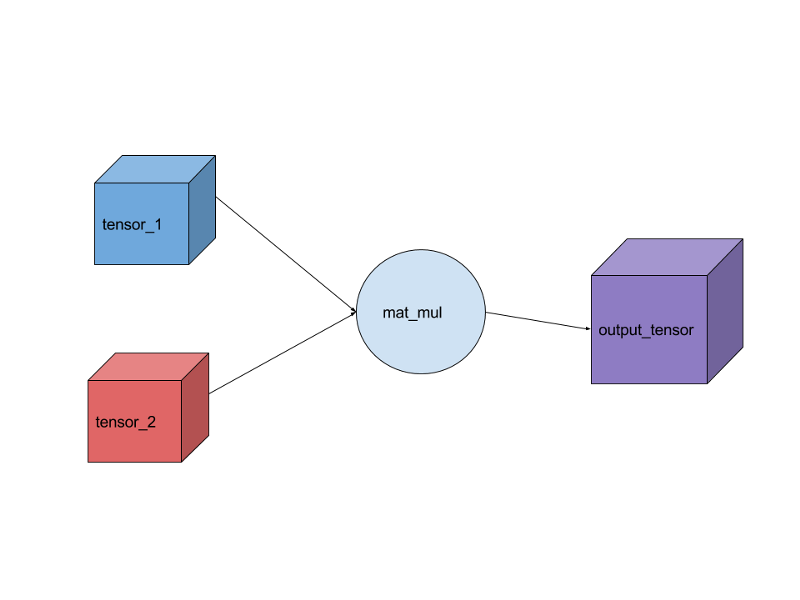

In [11]:
Image("RNN_IMAGES/tf1.png")

## Graph 

위 예에서 constants와 operation은 자동으로 Tensorflow 내에서 graph에 더해져 사용된다. 하지만 graph를 직접 불러서 쓸 수 있는데 한 파일 내에서 서로 독립적인 여러 개의 모델을 만들고 싶을 때 유용하다.

In [12]:
new_graph = tf.Graph()

with new_graph.as_default():
    new_g_const = tf.constant([1., 2.])

In [13]:
default_g = tf.get_default_graph()

## Session 

텐서플로우에는 두 종류의 Session 객체가 있다.

### tf.Session() 

이는 operations과 tensors을 실행하고 평가할 수 있는 캡슐화된 환경이다. Session는 그들 자신들의 변수들, 큐, 리더를 가질 수 있다. 그래서 세션이 끝난 후엔 꼭 close() 메소드를 사용해줘야 한다.

Session에는 3가지 인자가 있는데 optional하다.

1. target - The execution engine to connect to.
2. graph - The Graph to be lanched
3. config - A ConfigProto protocol buffer with configuration options for the session

### tf.InteractiveSession() 

이는 tf.Session()과 거의 동일하지만 IPython, Jupyter Notebooks를 위해 사용할 수 있다? 그래서 Session.run()이 아니라 Tensor.eval()과 Operation.run()을 사용할 수 있다.

In [14]:
sess = tf.InteractiveSession()
a = tf.constant(1)
b = tf.constant(2)
c = a + b
# instead of sess.run(c)
c.eval()

3

## Variables 

Variables은 Session에 의해 관리된다. Tensor와 Operation 객체는 변할 수 없기 때문에 세션 내에서 유용하게 사용할 수 있다.

In [15]:
tensorflow_var = tf.Variable(1, name="my_variable")

In [29]:
tensorflow_var

이러한 변수들을 초기화 시키는 여러 방법들

* tf.zeros() — creates a matrix full of zeros
* tf.ones() — creates a matrix full of ones
* tf.random_normal() — a matrix with random uniform values between an interval
* tf.random_uniform() — random normally distributed numbers
* tf.truncated_normal() — same as random normal but doesn’t include any numbers more than 2 standard deviations.

In [24]:
# 4x4x4 matrix normally distribued mean 0 std 1
normal = tf.truncated_normal([4, 4, 4], mean=0.0, stddev=1.0)

In [25]:
normal

<tf.Tensor 'truncated_normal:0' shape=(4, 4, 4) dtype=float32>

텐서를 Variable로 만들어 사용하고 싶을 때

<보통 weight들을 이런식으로 초기화!>

In [30]:
normal_var = tf.Variable(tf.truncated_normal([4,4,4] , mean=0.0, stddev=1.0))

In [31]:
normal_var 

이러한 varaibles들을 초기화하기 위해서는 initialization function을 session으로 전달하여 수행해줘야 한다.

In [32]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [36]:
initial_var = tf.Variable(1)
changed_var = initial_var.assign(initial_var + initial_var)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
print sess.run(changed_var)
# 2
print sess.run(changed_var)
# 4
print sess.run(changed_var)
# 8
# .... and so on
sess.close()

2
4
8


## Scope 

모델의 복잡성을 컨트롤하고 더 쉽게 만들기 위해 scope로 조각을 낸다. 이러한 Scopes 조각들은 TensorBoard를 사용할 때 아주 쉽고 간단하게 도움을 줄 수 있다.(겉보기엔 쓸모 없어보이지만 TensorBoard와 함께 사용하면 그 위력이 올라간다!)

In [41]:
with tf.name_scope("Scope1"):
    with tf.name_scope("Scope_nested"):
        nested_var = tf.mul(5, 5)

# CS224d - Introduction to Tensorflow 

## Deep-Learning Package Zoo 

* Torch
* Caffe
* Theano(Keras, Lasagne)
* CuDNN
* Tensorflow
* Mnex

어떤 패키지를 쓰는게 좋은가??

모델을 정의하는 방법 

1. Configuration file(Caffe, DistBeleif, CNTK)
2. Programmatic generation(Torch, Theano, Tensorflow)

For Programmatic models, choice of high-level language:
* Lua(Torch)
* Python(Theano, Tensorflow)
* others
<hr>
Configuration으로 ResNet을 표현하면 1 Layer로 대변되는 JSON을 수십개나 봐야한다...! Programmatic 하게 접근하면 for문으로 간편히 볼 수도 있고 당신의 프로그램의 일부로서 딥러닝을 할 수 있다..
<hr>
Lua보다 Python 관련 커뮤니티가 잘 활성화 되있기 때문에 python을 공부하장..

##  TensorFlow vs Theano

1. Theano is another deep-learning library with python-wrapper(was inspiration for Tensorflow)
2. Theano와 TensorFlow는 매우 비슷한 시스템이다. but TensorFlow는 분산 시스템 대해 더 잘 작동함.
<hr>
스피드 벤치마킹에 따르면 TensorFlow는 다른 라이브러리보다 좀 느림.. 앞서 말했듯이 매우 큰 모델(다수의 GPU 사용하는)에 대해서는 더 빠르다. 

## What does TF actually do? 

텐서플로우는 기본적으로 텐서들에 대한 함수를 정의하면 이에 대해 자동으로 도함수를 계산한다.(미리?)
<hr>
* A scalar is a tensor
* A vector is a tensor
* A matrix is a tensor
* Common to have fixed basis, so a tensor can be represented as a multidimensional array of numbers.

## TensorFlow vs Numpy 

많은 사람들이 TF를 numpy하고는 비교하지는 않지만 둘은 아주 비슷하다. (N-d array를 지원한다는 점에서) but Numpy는 자동으로 도함수를 계산해주지 않고 GPU support도 없다!

### Numpy 

In [1]:
import numpy as np

In [2]:
a = np.zeros((2,2))
b = np.ones((2,2))

In [3]:
a

array([[ 0.,  0.],
       [ 0.,  0.]])

In [4]:
b

array([[ 1.,  1.],
       [ 1.,  1.]])

In [5]:
np.sum(b, axis=1)

array([ 2.,  2.])

In [6]:
a.shape

(2, 2)

In [7]:
np.reshape(a,(1,4))

array([[ 0.,  0.,  0.,  0.]])

### TensorFlow

In [5]:
import tensorflow as tf

In [6]:
tf.InteractiveSession()

In [7]:
a = tf.zeros((2,2))
b = tf.ones((2,2))

In [8]:
tf.reduce_sum(b, reduction_indices=1).eval()

array([ 2.,  2.], dtype=float32)

In [9]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [10]:
tf.reshape(a,(1,4)).eval()

array([[ 0.,  0.,  0.,  0.]], dtype=float32)

둘은 같은 테스크를 수행할 수 있다.

Numpy to TensorFlow Dictionary 참고..!

### 하지만..! TF requires explicit evaluation!

In [11]:
a = np.zeros((2,2))
ta = tf.zeros((2,2))

In [12]:
print(a)

[[ 0.  0.]
 [ 0.  0.]]


In [13]:
print(ta)

Tensor("zeros_1:0", shape=(2, 2), dtype=float32)


In [14]:
print(ta.eval())

[[ 0.  0.]
 [ 0.  0.]]


텐서플로우는 기본적으로 모든 것이 Computational Graph로 정의되기 때문에(미리 도함수를 계산해두기 위해) evaluate되기 전까지는 numerical value를 가지지 않는다.
<hr>
Computational Grapy => Symbolic Entity

"TensorFlow programs are usually structured into a construction phase, that assembles a graph, and an execution phase that uses a session to execute ops in the graph"

## TensorFlow Session Object 

In [19]:
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b

with tf.Session() as sess:
    print(sess.run(c))
    print(c.eval())

30.0
30.0


c.eval() is just syntantic sugar for sess.run(c) in the currently active session!

## TensorFlow Variables 

In [20]:
W1 = tf.ones((2,2))
W2 = tf.Variable(tf.zeros((2,2)), name="weights")

In [22]:
with tf.Session() as sess:
    print(sess.run(W1))
    sess.run(tf.initialize_all_variables())
    print(sess.run(W2))

[[ 1.  1.]
 [ 1.  1.]]
[[ 0.  0.]
 [ 0.  0.]]


일반적인 프로그래밍의 변수와는 달리 tf의 Variables는 initialize하기 전까지 value를 가지지 않는다. (constant는 그 자체로 value를 가지고 있는셈)
<hr>
tf.Variables()는 initialize 하기 전까지 빈 박스

### Updating Variable State 

In [23]:
state= tf.Variable(0, name="counter")

In [24]:
new_value = tf.add(state, tf.constant(1)) # new_value = state + 1
update = tf.assign(state, new_value) # state = new_value

In [25]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

0
1
2
3


## Inputting Data 

이 전까지의 예에서는 텐서들을 직접 정의했었다. 
하지만 외부 데이터를 어떻게 tf로 넣을까?

### Simple solution : Import from Numpy

In [26]:
a = np.zeros((3,3))
ta = tf.convert_to_tensor(a)
with tf.Session() as sess:
    print(sess.run(ta))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


### Placeholders and Feed Dictionaries 

tf.conver_to_tensor()는 편리하지만 but doesn'y scale
<hr>
tf.placeholder(dummy nodes that provide entry points for data to computational graph)를 사용하라.

feed_dict는 tf.placeholder 변수들을 data(numpy arrays, lists, etc)로 매핑시켜주는 python dictionary이다.

computational graph의 input node라고 생각하라

In [27]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.mul(input1,input2)

In [29]:
with tf.Session() as sess:
    print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))

[array([ 14.], dtype=float32)]


## Variable Scope 

복잡한 텐서플로우 모델은 수백가지 변수들을 가질 수도 있다.

* tf.variable_scope() 는 충돌을 피하기 위해 간단한 name-spacing을 제공한다.

* tf.get_variable()는 variable scope 내에서 변수들을 생성하거나 접근한다.

In [21]:
with tf.variable_scope("foo"):
    with tf.variable_scope("bar"):
        x = tf.get_variable("x", [1])
assert x.name == "foo/bar/x:0"

In [22]:
x.name

u'foo/bar/x:0'

또한 variable을 재사용하기 위해서 사용하기도 한다?

In [38]:
with tf.variable_scope("foo"):
    y = tf.get_variable("y",[1])
    tf.get_variable_scope().reuse_variables()
    y1 = tf.get_variable("y", [1])
assert y1 == y

In [40]:
y1.name

u'foo/y:0'

In [41]:
y.name

u'foo/y:0'

reuse_variables()는 RNN에 유용하게 사용될지도?

In [43]:
with tf.variable_scope("foo"):
    z = tf.get_variable("z",[1])
with tf.variable_scope("foo", reuse=True):
    z1 = tf.get_variable("z",[1])
assert z1 == z

## Linear Regression in TensorFlow 

In [45]:
import numpy as np
import seaborn
from matplotlib import pyplot as plt
% matplotlib inline

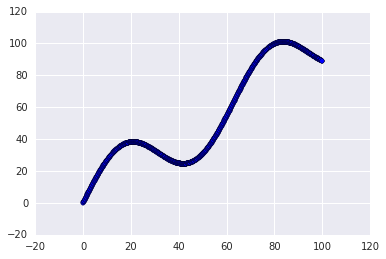

In [46]:
# Define input_data
X_data = np.arange(100, step=.1)
y_data = X_data + 20*np.sin(X_data/10)

# Plot input_data
plt.scatter(X_data,y_data)

In [48]:
# Define data size and batch size
n_samples = 1000
batch_size = 100

# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))

# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size,1))
y = tf.placeholder(tf.float32, shape=(batch_size,1))

In [49]:
# Define variables to be learned
with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights", (1,1),
                       initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,),
                       initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y-y_pred)**2/n_samples)

In [82]:
# Sample code to run one step of gradient descent
opt = tf.train.AdamOptimizer()

opt_operation = opt.minimize(loss)

with tf.Session() as sess:
    # Initialize Variables in graph
    sess.run(tf.initialize_all_variables())
    # Gradient descent loop for 500 steps
    for _ in range(500):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        # Do gradient descent step
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X:X_batch, y:y_batch})
    
    w_p = sess.run(W)
    b_p = sess.run(b)